In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
a = 0.1

In [93]:
potentials = []

In [94]:
n_seq = 100
seq_len = 500

In [95]:
x = [a*i for i in range(seq_len)]
psi = []
densities = []

In [96]:
for i in range(n_seq):
    R = np.random.rand()
    potential = [-1]
    for j in range(seq_len - 1):
        potential.append(-2 * np.random.rand() - R)
    potentials.append(potential)

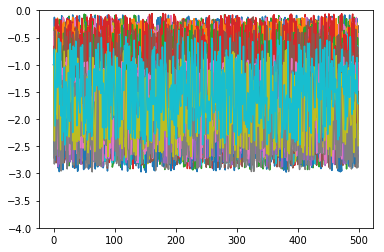

In [97]:
for i in range(n_seq):
    plt.plot(potentials[i])
    plt.ylim([-4, 0])

In [98]:
for i in range(n_seq):
    q = np.random.randint(low = 2, high = 5)
    for j in range(1, seq_len):
        for k in range(q):
            potentials[i][j] = 0.5*(potentials[i][j - 1] + potentials[i][j])

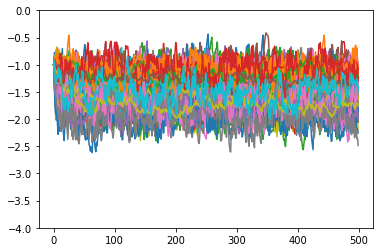

In [99]:
for i in range(n_seq):
    plt.plot(potentials[i])
    plt.ylim([-4, 0])

In [100]:
A = []
B = []

In [101]:
for i in range(n_seq):
    psi_i = [1*np.sin(x[0]) + 1*np.cos(x[0])]
    density_i = [psi_i[0]**2]
    A_i = [1]
    B_i = [1]
    A.append(A_i)
    B.append(B_i)
    for j in range(1, seq_len):
        k_curr = np.sqrt(-potentials[i][j])
        k_prev = np.sqrt(-potentials[i][j - 1])
        A_prev = A[i][j - 1]
        B_prev = B[i][j - 1]
        x_prev = x[j - 1]
        x_curr = x[j]
        A_curr = (1/k_curr)*(A_prev*(k_curr*np.sin(k_prev*x_prev)*np.sin(k_curr*x_prev) \
                         + k_prev*np.cos(k_prev*x_prev)*np.cos(k_curr*x_prev)) +
                B_prev*(k_curr*np.cos(k_prev*x_prev)*np.sin(k_curr*x_prev) \
                         - k_prev*np.sin(k_prev*x_prev)*np.cos(k_curr*x_prev)))
        
        B_curr = (1/k_curr)*(B_prev*(k_prev*np.sin(k_prev*x_prev)*np.sin(k_curr*x_prev) \
                         + k_curr*np.cos(k_prev*x_prev)*np.cos(k_curr*x_prev)) +
                A_prev*(k_curr*np.sin(k_prev*x_prev)*np.cos(k_curr*x_prev) \
                         - k_prev*np.cos(k_prev*x_prev)*np.sin(k_curr*x_prev)))
        
        A[i].append(A_curr)
        B[i].append(B_curr)
        psi_i.append(A_curr*np.sin(k_curr*x_curr) + B_curr*np.cos(k_curr*x_curr))
        density_i.append(psi_i[-1]**2)
    psi.append(psi_i)
    densities.append(density_i)


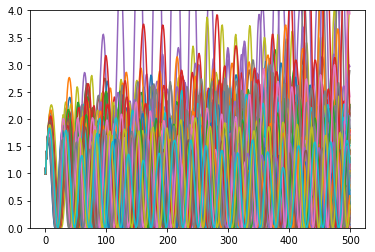

In [102]:
for i in range(n_seq):
    plt.plot(densities[i])
    plt.ylim([0, 4])

In [103]:
np.savez('./Potentials.npz', potentials)
np.savez('./Densities.npz', densities)